# Reference for homework 3

This is a snippet from the Week  recitation 
Approximation of the sine function: using a shallow neural network model on the domain $[-\pi, \pi]$

In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd


In [45]:
# You should replace the data with the ones provided in the homework specification
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
X_val = pd.read_csv('X_val.csv')

y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_val = pd.read_csv('y_val.csv')

X_train= X_train.iloc[:, 0].to_numpy()
X_val= X_val.iloc[:, 0].to_numpy()
X_test= X_test.iloc[:, 0].to_numpy()
y_train= y_train.iloc[:, 0].to_numpy()
y_test= y_test.iloc[:, 0].to_numpy()
y_val= y_val.iloc[:, 0].to_numpy()

# sort the test data for plotting
#test_data = sorted([(X_test[i], y_test[i]) for i in range(y_test.shape[0])], key=lambda x:x[0])


In [49]:
# Define the layer structure of the neural network
# Input layer which is actually the input of the 1-dim. real Sinus function
input_layer = layers.Input(shape=(1,)) # n
# Hidden layer where the heavy lifting of the approximation of the Sinus function is performed.
# Note that hidden_layer uses the input_layer as input
# For homework 3, try using different number of hidden units, adding one more hidden layer or different activation functions
hidden_layer = layers.Dense(800, activation= 'sigmoid')(input_layer) # m
# Output layer which is the result of the 1-dim. real Sinus function.
# Note that output_layer uses the hidden_layer as input
output_layer = layers.Dense(1, activation='linear')(hidden_layer) # k, sigmoid: probability

# Create the neural network model
model1 = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model1.summary()
model1.layers

# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model1.evaluate(X_test, y_test)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 800)            │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7518 - val_loss: 0.5063
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4639 - val_loss: 0.4901
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4758 - val_loss: 0.5306
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5175 - val_loss: 0.5743
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4910 - val_loss: 0.5053
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4983 - val_loss: 0.5053
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4825 - val_loss: 0.5195
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5271 - val_loss: 0.5191
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4892 - val_loss: 0.4941
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4841 - val_loss: 0.5200
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5037 - val_loss: 0.5035
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

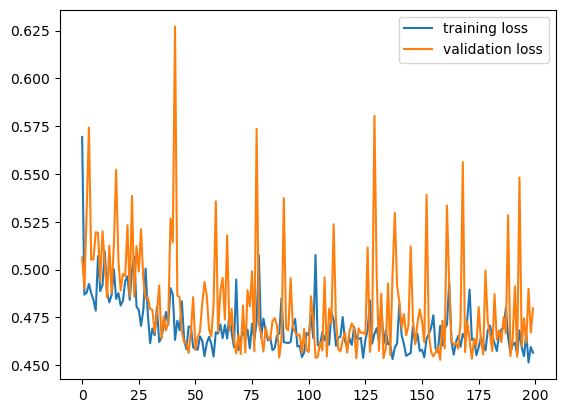

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


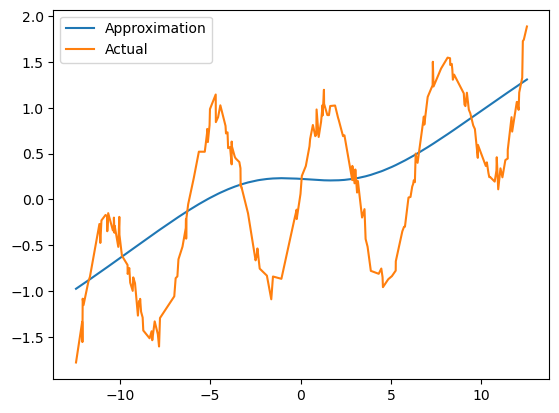

Test error=0.401812593290168


In [50]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model1.predict(X_test)
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()

y_pred=y_pred.flatten()
y_test=y_test.flatten()
testerr=np.mean((y_pred-y_test)**2)

print("Test error="+ str(testerr))




In this model we observe a mediocre test error of 0.40181 we have 1 hidden layer with a sigmoid activation function and 800 neurons. In the following examples I will experiment with changing the number of neurons, the activation function and the number of layers.  

In [51]:
#example 2: more neurons?
input_layer = layers.Input(shape=(1,)) # n

hidden_layer = layers.Dense(1000, activation= 'sigmoid')(input_layer) # m

output_layer = layers.Dense(1, activation='linear')(hidden_layer)
model2 = keras.Model(inputs=input_layer, outputs=output_layer)
model2.summary()
model2.layers
model2.compile(loss='mean_squared_error', optimizer='adam')

history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

loss = model2.evaluate(X_test, y_test)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1000)           │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,001 (11.72 KB)

 Trainable params: 3,001 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6252 - val_loss: 0.5107
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5277 - val_loss: 0.5065
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4971 - val_loss: 0.5457
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4961 - val_loss: 0.5655
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4831 - val_loss: 0.5269
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4837 - val_loss: 0.5246
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4645 - val_loss: 0.5041
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4941 - val_loss: 0.5129
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4838 - val_loss: 0.4922
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5094 - val_loss: 0.5078
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4745 - val_loss: 0.4909
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

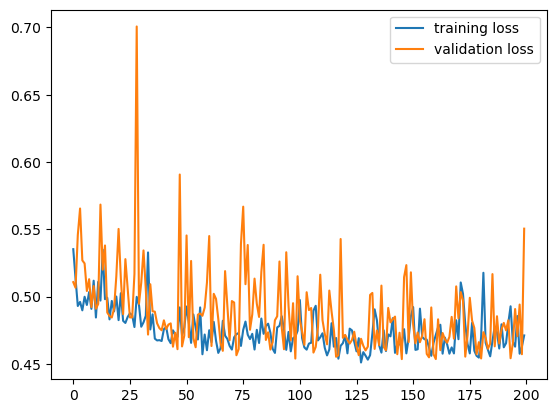

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


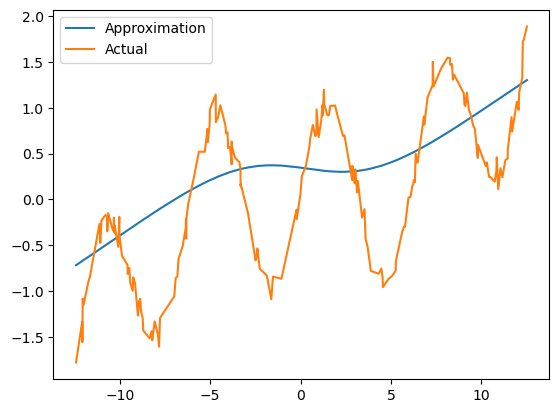

Test error=0.43930156703632306


In [55]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model2.predict(X_test)
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()


y_pred=y_pred.flatten()
y_test=y_test.flatten()
testerr=np.mean((y_pred-y_test)**2)
print("Test error="+ str(testerr))




In example 2 we have 200 more neurons and the test error increases to 0.43930 so we can see that perhaps increasing the numb3er of neurons isnt the most helpful to approximate the ftarget. In the next example I will change the activation function to relu and maintain the number of neurons to 800 as the first example. 

In [56]:
#Test 2: relu activation function
input_layer = layers.Input(shape=(1,))
hidden_layer =layers.Dense(800, activation= 'relu')(input_layer)
# Output layer which is the result of the 1-dim. real Sinus function.
# Note that output_layer uses the hidden_layer as input
output_layer = layers.Dense(1, activation='linear')(hidden_layer) # k, sigmoid: probability

# Create the neural network model
model3 = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model3.summary()
model3.layers

# Compile model
model3.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model3.evaluate(X_test, y_test)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 800)            │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6076 - val_loss: 0.5080
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4959 - val_loss: 0.4924
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4850 - val_loss: 0.4989
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4805 - val_loss: 0.4970
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4716 - val_loss: 0.4813
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4734 - val_loss: 0.4761
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4638 - val_loss: 0.4740
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4582 - val_loss: 0.4676
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4493 - val_loss: 0.4579
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4330 - val_loss: 0.4397
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4288 - val_loss: 0.4302
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

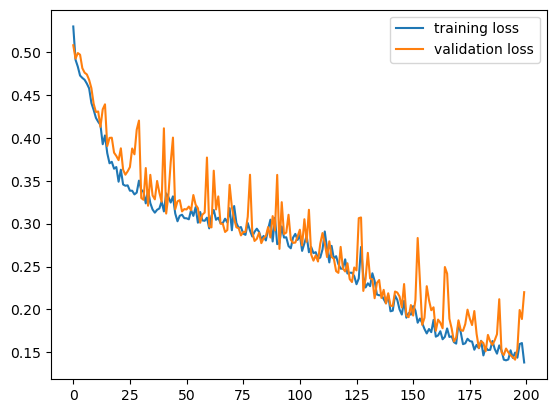

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


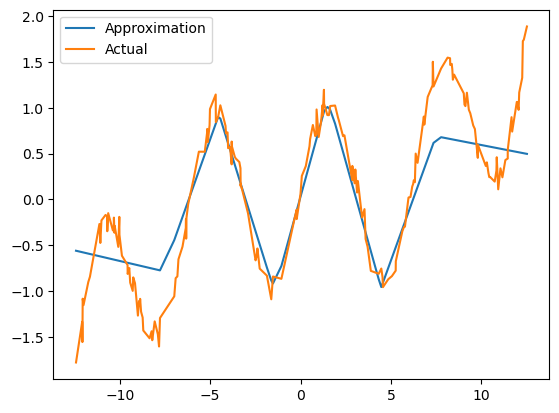

Test error=0.16467450331474306


In [58]:

# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model3.predict(X_test)
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()

y_pred=y_pred.flatten()
y_test=y_test.flatten()
testerr=np.mean((y_pred-y_test)**2)
print("Test error="+ str(testerr))



We see the test error decreases quite a lot in the relu activation function from the previous sigmoid activation function, the test score is now 0.16467 instead of 0.4393015. This is a great improvement therefore in the next example which I found to be the most optimizing, I will change my activation function once again but this time to a tanh function as it allows for a more preiodic approximation and still permits negative values. 

function due to its linear nature, the test error increases to 1.27915 which is the worst one yet. Increasing the number of neurons didnt help the model much therefore in the next example I will opt for more layers while choosing a tanh activation function that is curved like the sigmoid activation function but tahn maps to negative numbers which will fit the target better. Furthermore I will add more layers as more layers typically help approximations. 

In [59]:
#Test 3: 4 hidden layers 
input_layer = layers.Input(shape=(1,)) # n
# Hidden layer where the heavy lifting of the approximation of the Sinus function is performed.
# Note that hidden_layer uses the input_layer as input
# For homework 3, try using different number of hidden units, adding one more hidden layer or different activation functions
hidden_layer = layers.Dense(100, activation= 'tanh')(input_layer) # m
hidden_layer2 =layers.Dense(50, activation= 'tanh')(hidden_layer)
hidden_layer3 =layers.Dense(30, activation= 'tanh')(hidden_layer2)
hidden_layer4 =layers.Dense(5, activation= 'tanh')(hidden_layer3)
# Output layer which is the result of the 1-dim. real Sinus function.
# Note that output_layer uses the hidden_layer as input
output_layer = layers.Dense(1, activation='linear')(hidden_layer4) # k, sigmoid: probability

# Create the neural network model
model4 = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model4.summary()
model4.layers

# Compile model
model4.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model4.evaluate(X_test, y_test)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,941 (27.11 KB)

 Trainable params: 6,941 (27.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4824 - val_loss: 0.3891
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3728 - val_loss: 0.3258
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2754 - val_loss: 0.2184
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1851 - val_loss: 0.1613
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1446 - val_loss: 0.1445
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137 - val_loss: 0.1259
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1175 - val_loss: 0.1225
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1035 - val_loss: 0.1153
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0965 - val_loss: 0.1120
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0905 - val_loss: 0.1123
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0889 - val_loss: 0.1110
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

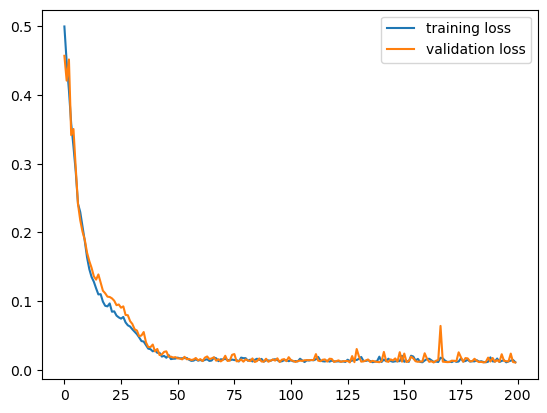

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


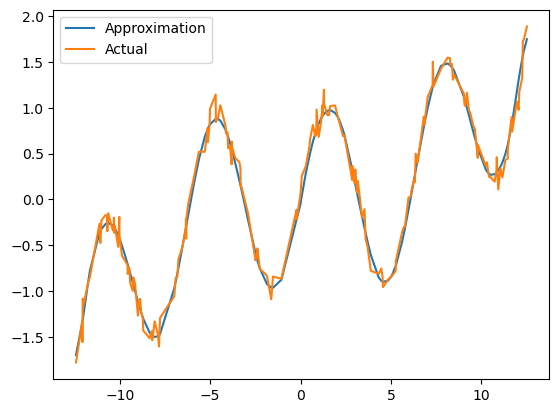

0.011066085075778869

In [43]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model4.predict(X_test)
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()

y_pred=y_pred.flatten()
y_test=y_test.flatten()
testerr=np.mean((y_pred-y_test)**2)
print("Test error="+ str(testerr)


Finally, we see the test error dramatically decrease to 0.011066 which is my best approximation and will likely not decrease as we see the loss stagnate at around 0.01

D) Comparing with question A the test error is dramatically better from 0.4018 in A to 0.01106 in my last example. I think the model improves because of the tanh activation function as it can capture negative relationships and curvature. the increment in the number of hidden layers was also key to the test error's decrease as adding complexity generally allows for the model's approximation to be better. 
